<a href="https://colab.research.google.com/github/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCVK WEEK 3**

**MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast,
Inverse, Logarithmic Brightness, dan Grayscale Image**

Nama :   Ratnasari

Kelas : TI 3D

NIM : 2241720007

Absen : 25

Link Pengerjaan :

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

Formula : g(x, y) = f(x, y) + b

 g(x,y) adalah nilai pixel setelah transformasi,

 f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


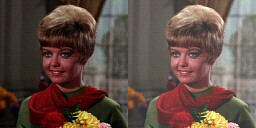

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ratna/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

Implementasi Inverse Citra
--------------------------------


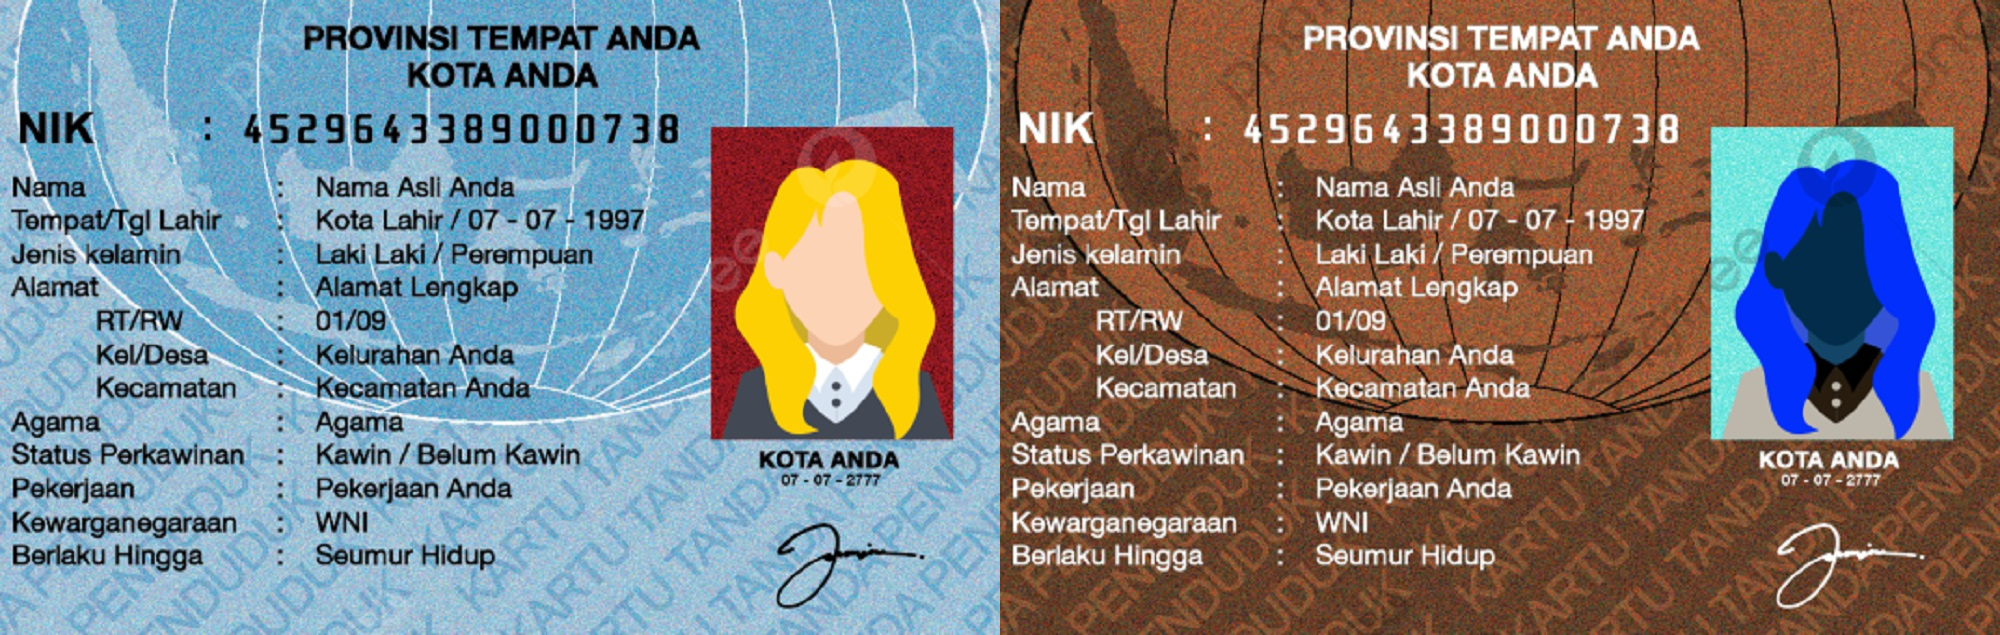

In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Implementasi Inverse Citra')
print('--------------------------------')

# Baca gambar asli
image_path = '/content/drive/MyDrive/ratna/gambar ktp.jpg'
original = cv.imread(image_path)

# Periksa apakah gambar berhasil dibaca
if original is None:
    print("Error: Gambar tidak ditemukan.")
else:
    # Implementasi inverse citra (menggunakan formula 255 - pixel_value)
    inverse_image = 255 - original

    # Gabungkan citra asli dan citra inverse untuk perbandingan
    final_frame = cv.hconcat((original, inverse_image))

    # Tampilkan hasilnya
    cv2_imshow(final_frame)


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


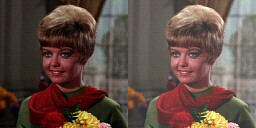

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
  if contrast < 1.0 or contrast > 3.0:
    raise ValueError
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ratna/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


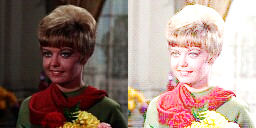

In [12]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# Input nilai kecerahan
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')
brightness = float(input('Masukkan nilai kecerahan: '))

# Baca gambar asli
image_path = '/content/drive/MyDrive/ratna/female.jpg'
original = cv.imread(image_path)

# Periksa apakah gambar berhasil dibaca
if original is None:
    print("Error: Gambar tidak ditemukan.")
else:
    # Konversi ke tipe float32 untuk melakukan operasi logaritmik
    original_float = np.float32(original)

    # Tentukan nilai konstanta c untuk skala
    c = 255 / np.log(1 + np.max(original_float))

    # Terapkan transformasi log dan tambahkan faktor kecerahan
    log_transformed = c * np.log(1 + original_float) + brightness

    # Normalisasi ke rentang [0, 255] dan ubah kembali ke tipe uint8
    log_transformed = np.uint8(np.clip(log_transformed, 0, 255))

    # Gabungkan citra asli dan citra hasil transformasi log untuk perbandingan
    final_frame = cv.hconcat((original, log_transformed))

    # Tampilkan hasilnya
    cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance



a. Averaging

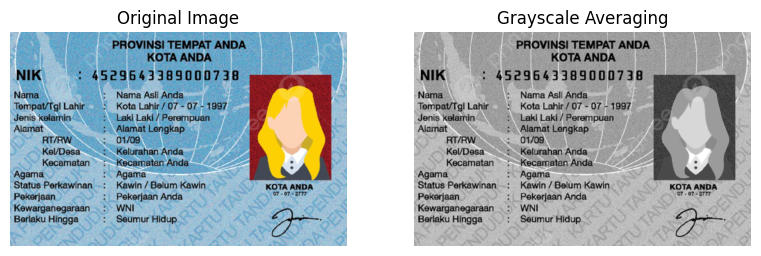

In [89]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

# Baca gambar
image_path = '/content/drive/MyDrive/ratna/gambar ktp.jpg'
img = cv.imread(image_path)

# Konversi gambar dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Definisikan fungsi transformasi grayscale
def grayscale_averaging(img_rgb):
    return np.mean(img_rgb, axis=2)

# Terapkan fungsi grayscale
gray_averaging = grayscale_averaging(img_rgb)

# Tampilkan hasil dengan subplot yang lebih besar
plt.figure(figsize=(20, 10))  # Menentukan ukuran figure

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Grayscale Averaging')
plt.imshow(gray_averaging, cmap='gray')
plt.axis('off')

plt.show()


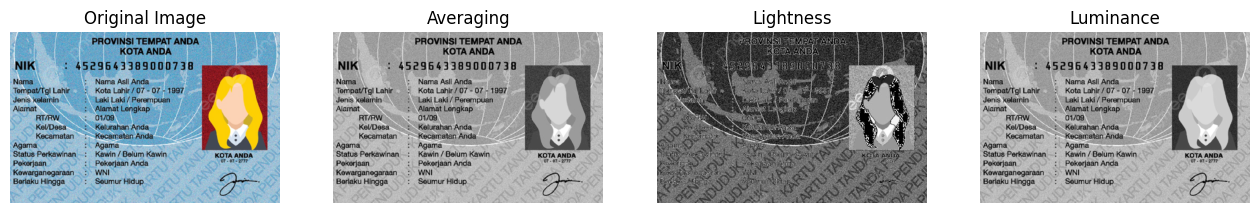

In [78]:
# Install necessary libraries
!pip install opencv-python-headless matplotlib

# Import libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/drive/MyDrive/ratna/gambar ktp.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Define grayscale transformation functions
def grayscale_averaging(image):
    return np.mean(image, axis=2)

def grayscale_lightness(image):
    max_val = np.max(image, axis=2)
    min_val = np.min(image, axis=2)
    return (max_val + min_val) / 2

def grayscale_luminance(image):
    return 0.21 * image[:, :, 0] + 0.72 * image[:, :, 1] + 0.07 * image[:, :, 2]

# Apply grayscale transformations
gray_averaging = grayscale_averaging(image)
gray_lightness = grayscale_lightness(image)
gray_luminance = grayscale_luminance(image)

# Display the images
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Averaging')
plt.imshow(gray_averaging, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Lightness')
plt.imshow(gray_lightness, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Luminance')
plt.imshow(gray_luminance, cmap='gray')
plt.axis('off')

plt.show()


b. Lightness

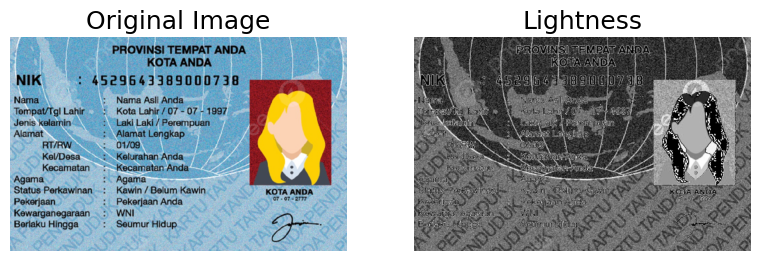

In [96]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Baca gambar
image_path = '/content/drive/MyDrive/ratna/gambar ktp.jpg'
img = cv.imread(image_path)

# Konversi gambar dari BGR ke RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Definisikan fungsi transformasi grayscale lightness
def grayscale_lightness(image):
    max_val = np.max(image, axis=2)
    min_val = np.min(image, axis=2)
    return (max_val + min_val) / 2

# Terapkan fungsi grayscale lightness
gray_lightness = grayscale_lightness(img_rgb)

# Tampilkan hasil dengan subplot yang lebih besar
plt.figure(figsize=(20, 10))  # Menentukan ukuran figure

# Gambar asli
plt.subplot(1, 4, 1)
plt.title('Original Image', fontsize=18)  # Menentukan ukuran font title
plt.imshow(img_rgb)
plt.axis('off')

# Gambar grayscale lightness
plt.subplot(1, 4, 2)
plt.title('Lightness', fontsize=18)  # Menentukan ukuran font title
plt.imshow(gray_lightness, cmap='gray')
plt.axis('off')

plt.show()


c. Luminannce

Hasil Grayscale: Metode Luminance


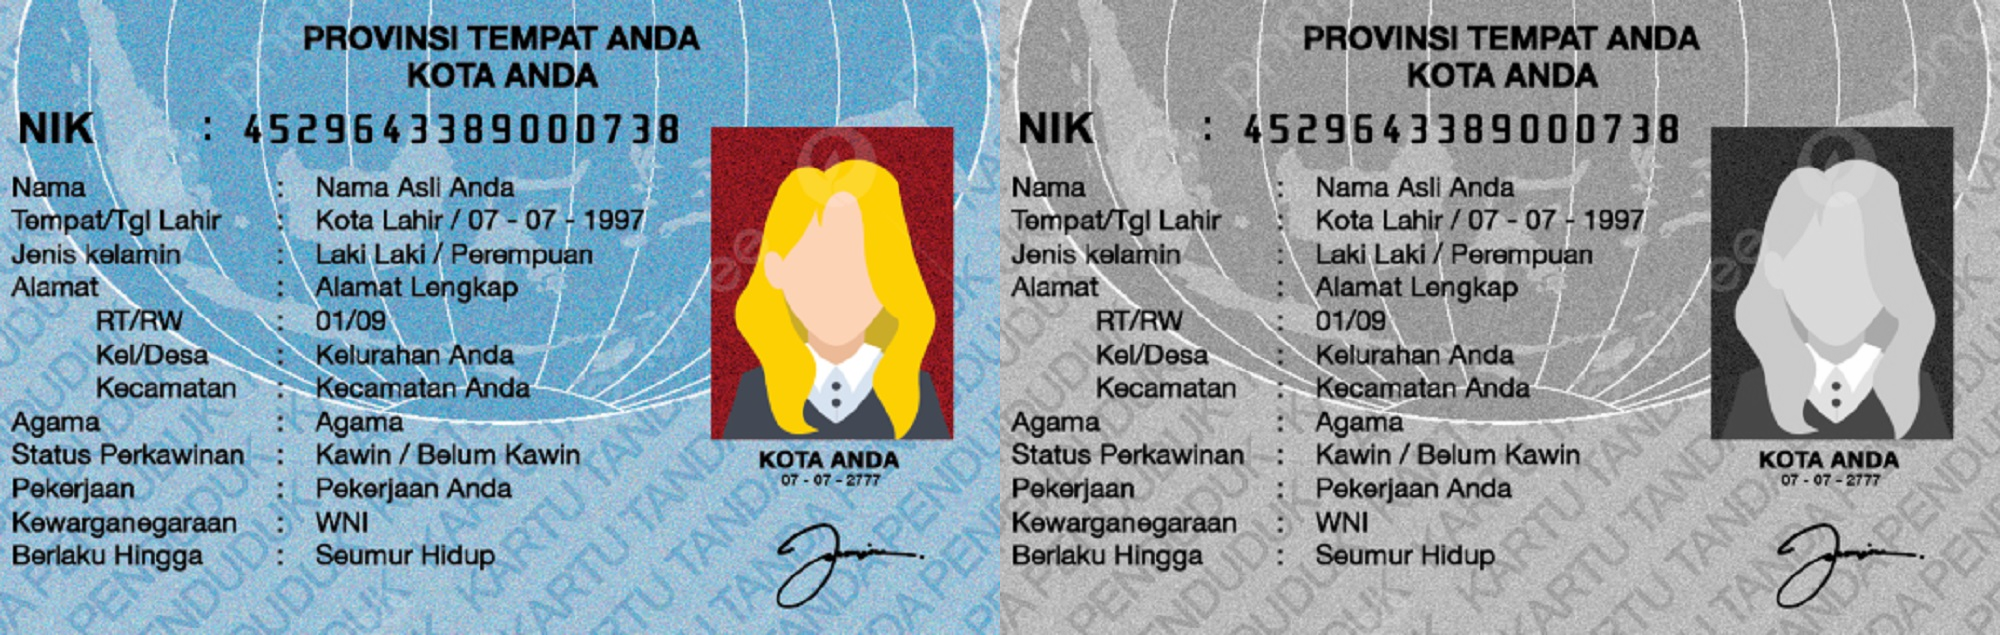

In [57]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar
image_path = '/content/drive/MyDrive/ratna/gambar ktp.jpg'
img = cv.imread(image_path)

# Pastikan gambar berhasil dibaca
if img is None:
    print("Error: Gambar tidak ditemukan.")
else:
    # Pisahkan channel R, G, B
    B, G, R = cv.split(img)

    # Metode Luminance
    grayscale_luminance = 0.21 * R + 0.72 * G + 0.07 * B
    grayscale_luminance = np.uint8(grayscale_luminance)

    # Konversi grayscale_luminance ke format BGR untuk gabungan gambar
    grayscale_luminance_colored = cv.cvtColor(grayscale_luminance, cv.COLOR_GRAY2BGR)
    final_frame_luminance = cv.hconcat([img, grayscale_luminance_colored])

    # Tampilkan hasil
    print("Hasil Grayscale: Metode Luminance")
    cv2_imshow(final_frame_luminance)


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale

Original Image
Result


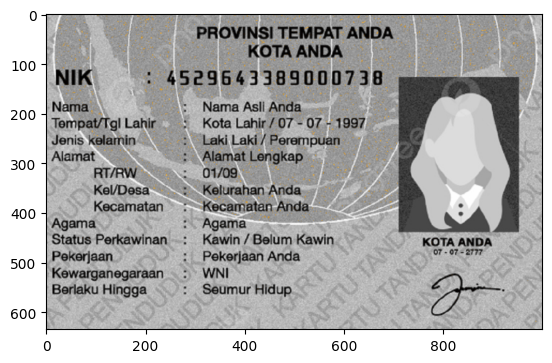

In [82]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca citra
image = cv2.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')
image2 = image
print('Original Image')
plt.imshow(image)

# Konversi citra ke format HSV
hsv_image = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)

# Tentukan rentang warna biru dalam format HSV
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])

# Buat mask untuk warna biru
mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Ubah warna lain menjadi grayscale
gray_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Gabungkan citra warna biru dengan citra grayscale
result = np.where(mask[:, :, np.newaxis].astype(bool), image2, gray_image)

# Tampilkan hasil
print('Result')
plt.imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()
